# Import

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# import data into dataframe
df = pd.read_csv('Data/heart.csv')

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Dataset Description

| Variable | Description |
| :-------------: | :---------------------------:|
| age | Age in years |
| sex | 1 = Male; 0 = Female |
| cp | Chest pain type (0 - 3:  asymptomatic, atypical angina, non-anginal pain, typical angina)|
| trtbps | Resting blood pressure (in mm Hg) |
| chol | Cholestoral in mg/dl fetched via BMI sensor |
| fbs | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| restecg | Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy)|
| thalachh | Maximum heart rate achieved|
| exng | Exercise induced angina (1 = yes; 0 = no) |
| oldpeak | ST depression induced by exercise relative to rest  |
| slp | The slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping) |
| caa | The number of major vessels (0-3) |
| thall | A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) |
| target | Heart disease (0 = no, 1 = yes) |

# Exploring data

In [23]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# data shape
df.shape

(303, 14)

In [25]:
# check column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
# check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

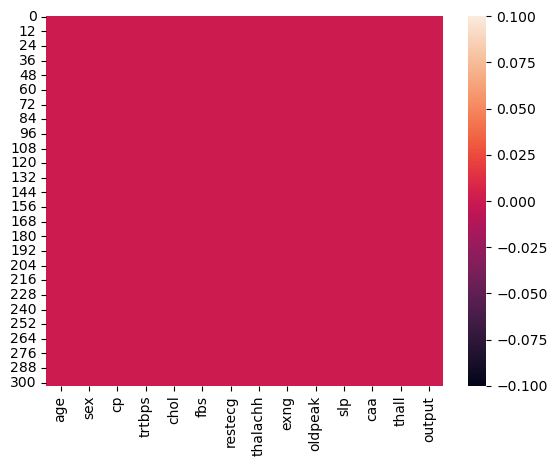

In [28]:
sns.heatmap(df.isna())

## Clean data

In [29]:
# check duplicates
df.duplicated().sum()

1

In [30]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [31]:
# check duplicates
df.duplicated().sum()

0

**Summary statistics:**
- Data Types: The dataset consists of integer and float data types.
- Missing Values: There are no missing values in any of the columns.
- Age ranges from 29 to 77 years, with a mean of approximately 54.
- Most data is from male.

In [32]:
# save cleaned data
df.to_csv('Data/heart_clean.csv', index=False)